<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/RSI_19Oct23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import date
import numpy as np


# Define a list of tickers
tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'AVGO', 'GS', 'SPY', 'QQQ']  # Add or modify as per your universe

def fetch_data(ticker_symbol):
    end_date = date.today().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2019-01-01", end=end_date)
    return data['Close']

def sma_crossover(data):
    short_window = 50
    long_window = 200
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()
    return signals

buy_signals = []
sell_signals = []

for ticker in tickers:
    data = fetch_data(ticker)
    signals = sma_crossover(data)

    # Check the most recent signal
    if signals['positions'].iloc[-1] == 1.0:  # Buy signal
        buy_signals.append(ticker)
    elif signals['positions'].iloc[-1] == -1.0:  # Sell signal
        sell_signals.append(ticker)

print("Stocks with Buy Signals:", buy_signals)
print("Stocks with Sell Signals:", sell_signals)


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define a list of tickers (for the sake of this example, I'll use a small list, but you can expand it)
tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'AVGO', 'GS', 'SPY', 'QQQ']

def fetch_data(ticker_symbol):
    end_date = date.today().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2010-01-01", end=end_date)
    return data['Close']

def check_sma_signal(data):
    short_window = 50
    long_window = 200
    short_mavg = data.rolling(window=short_window).mean()
    long_mavg = data.rolling(window=long_window).mean()

    # Check the most recent signal
    if short_mavg.iloc[-1] > long_mavg.iloc[-1] and short_mavg.iloc[-2] <= long_mavg.iloc[-2]:
        return "Buy"
    elif short_mavg.iloc[-1] < long_mavg.iloc[-1] and short_mavg.iloc[-2] >= long_mavg.iloc[-2]:
        return "Sell"
    else:
        return None

buy_signals = []
sell_signals = []

for ticker in tickers:
    data = fetch_data(ticker)
    signal = check_sma_signal(data)

    if signal == "Buy":
        buy_signals.append(ticker)
    elif signal == "Sell":
        sell_signals.append(ticker)

print("Stocks with Buy Signals:", buy_signals)
print("Stocks with Sell Signals:", sell_signals)


In [2]:
# Install TA-Lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2023-10-20 00:20:53--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-10-20 00:20:53--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://deac-ams.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-10-20 00:20:53--  http://deac-ams.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving deac-ams.dl.s

Above, installed talib which is, according to chatGPT: "TA-Lib, commonly known as "Technical Analysis Library," is an open-source software library that provides tools for technical analysis of financial markets. It is widely used by trading software developers and quantitative analysts for the development of trading strategies." Below is a chatGPT created RSI Buy Sell indicator. So below imported talib after above installation. Also, according to chatGPT: "The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. RSI oscillates between zero and 100. Traditionally, and according to Wilder, RSI is considered overbought when above 70 and oversold when below 30."

Buy Signal: When RSI crosses above a specified lower threshold (commonly 30).
Sell Signal: When RSI crosses below a specified upper threshold (commonly 70).



In [ ]:
import yfinance as yf
import pandas as pd
from datetime import date

import talib

# Define a list of tickers (for the sake of this example, I'll use a small list, but you can expand it)
tickers = ['BOIL', 'TSLA', 'IWM', 'GLD', 'TLT', 'AVGO', 'GS', 'SPY', 'QQQ']

def fetch_data(ticker_symbol):
    end_date = date.today().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2019-01-01", end=end_date)
    return data['Close']

def check_rsi_signal(data):
    rsi = talib.RSI(data)
    last_rsi = rsi.iloc[-1]
    prev_rsi = rsi.iloc[-2]

    if last_rsi > 30 and prev_rsi <= 30:
        return "Buy"
    elif last_rsi < 70 and prev_rsi >= 70:
        return "Sell"
    else:
        return None

buy_signals = []
sell_signals = []

for ticker in tickers:
    data = fetch_data(ticker)
    signal = check_rsi_signal(data)

    if signal == "Buy":
        buy_signals.append(ticker)
    elif signal == "Sell":
        sell_signals.append(ticker)

print("Stocks with Buy Signals:", buy_signals)
print("Stocks with Sell Signals:", sell_signals)


[*********************100%%**********************]  1 of 1 completed


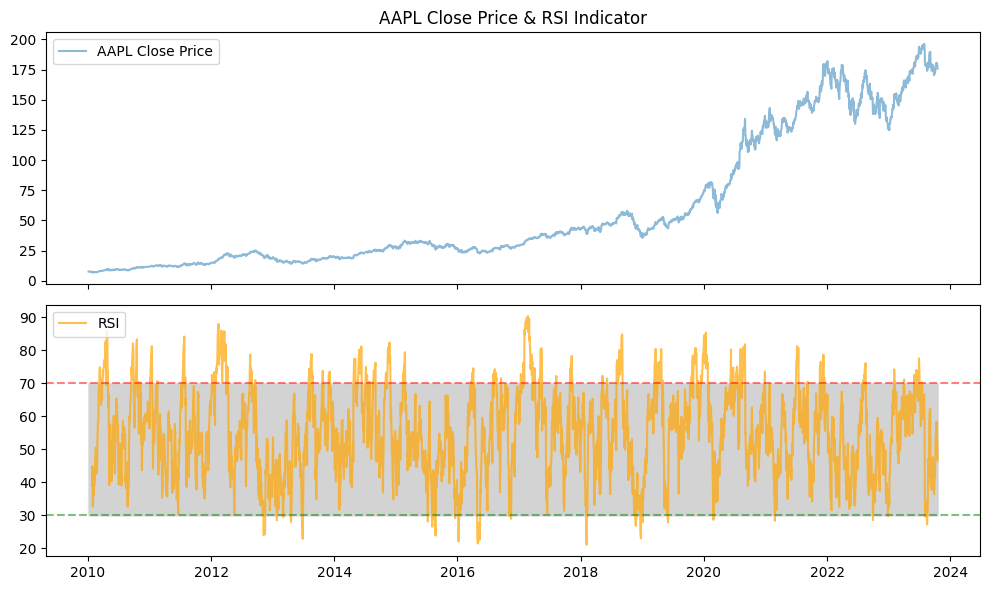

[*********************100%%**********************]  1 of 1 completed


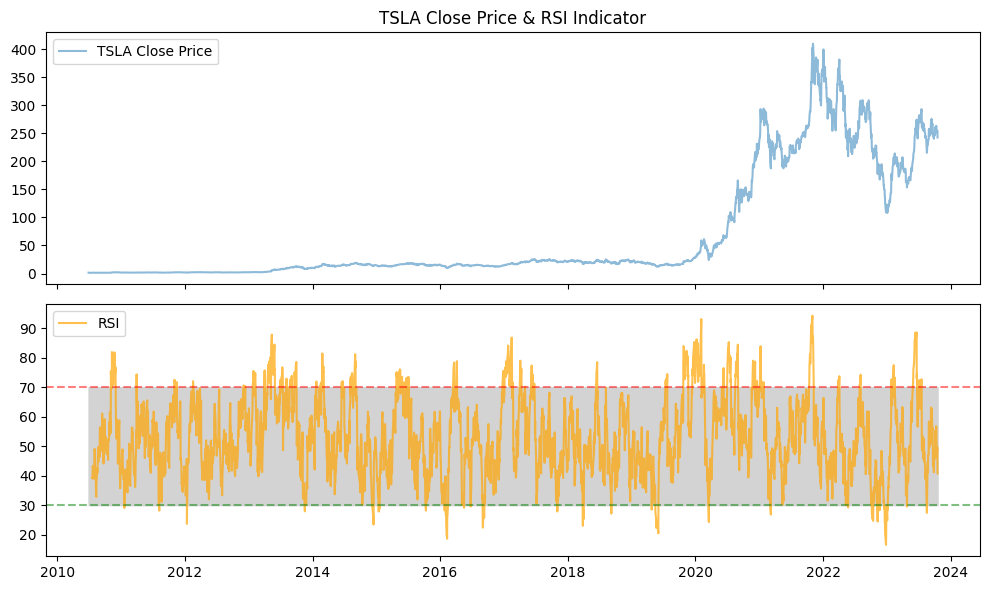

[*********************100%%**********************]  1 of 1 completed


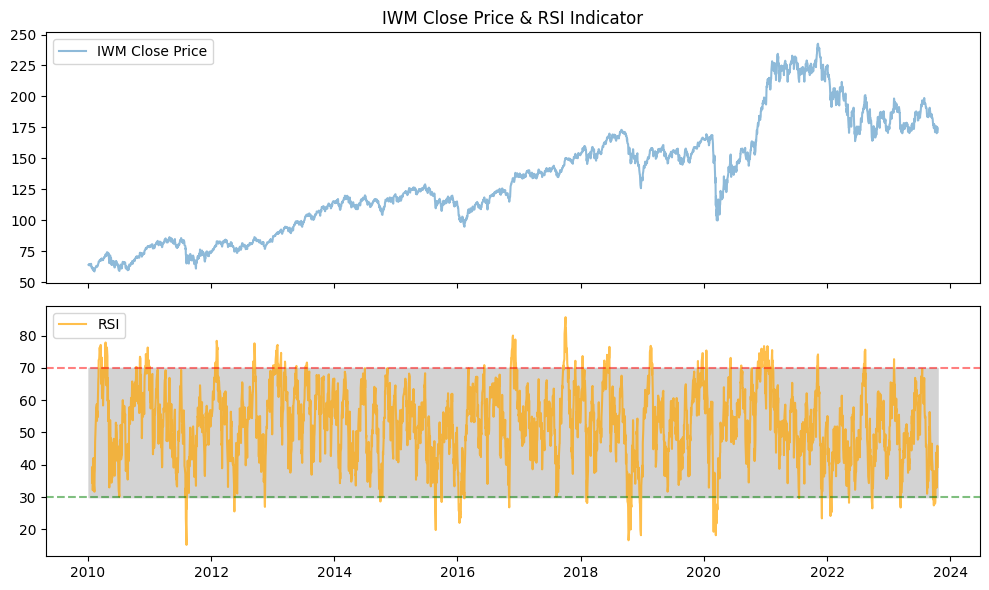

[*********************100%%**********************]  1 of 1 completed


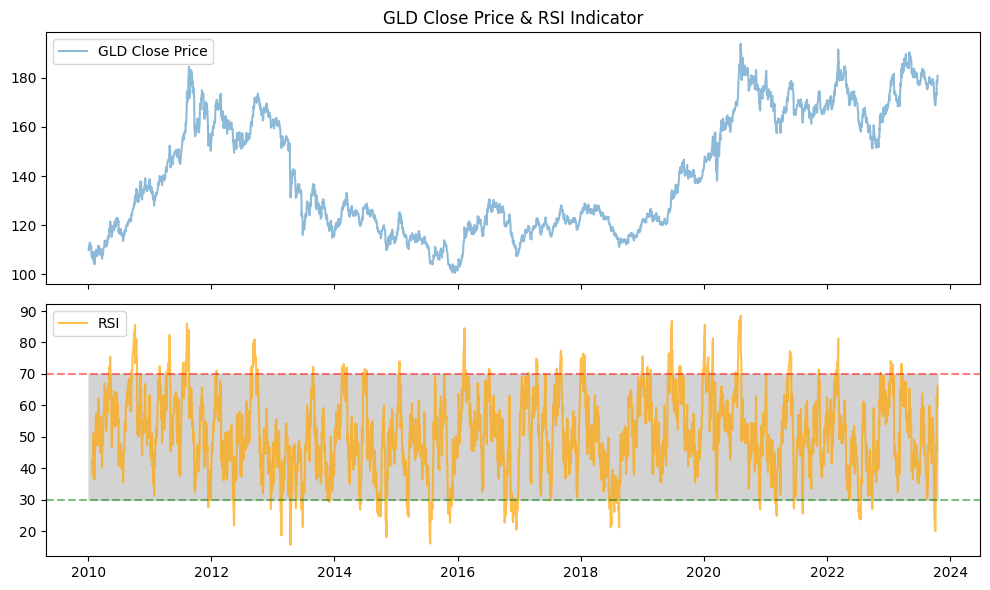

[*********************100%%**********************]  1 of 1 completed


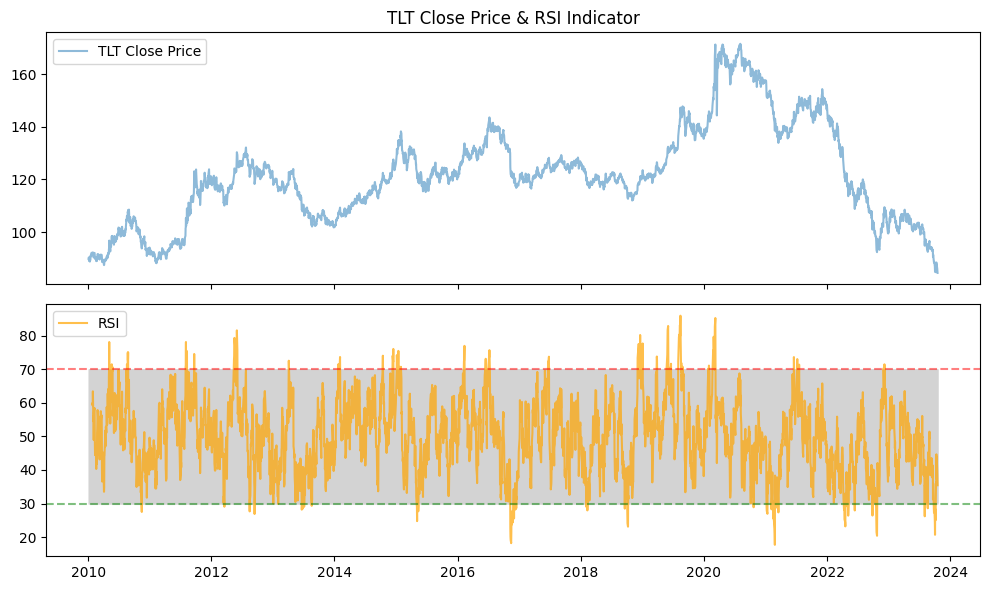

[*********************100%%**********************]  1 of 1 completed


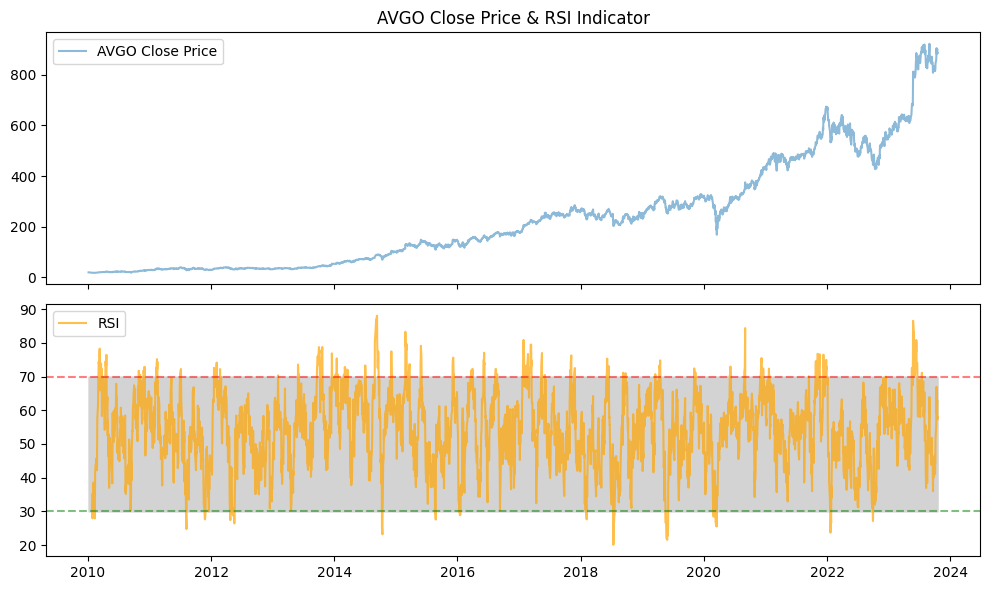

[*********************100%%**********************]  1 of 1 completed


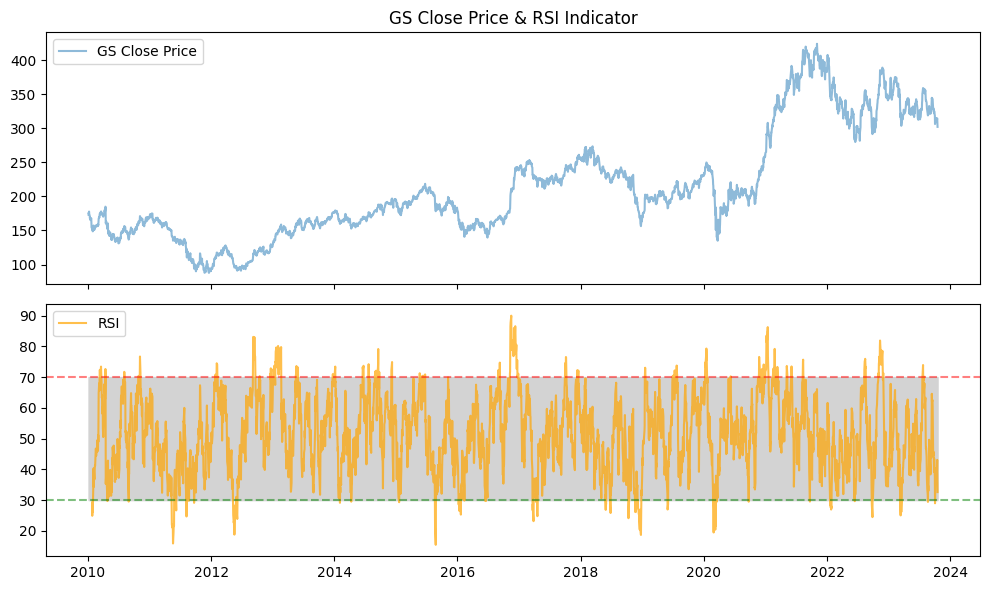

[*********************100%%**********************]  1 of 1 completed


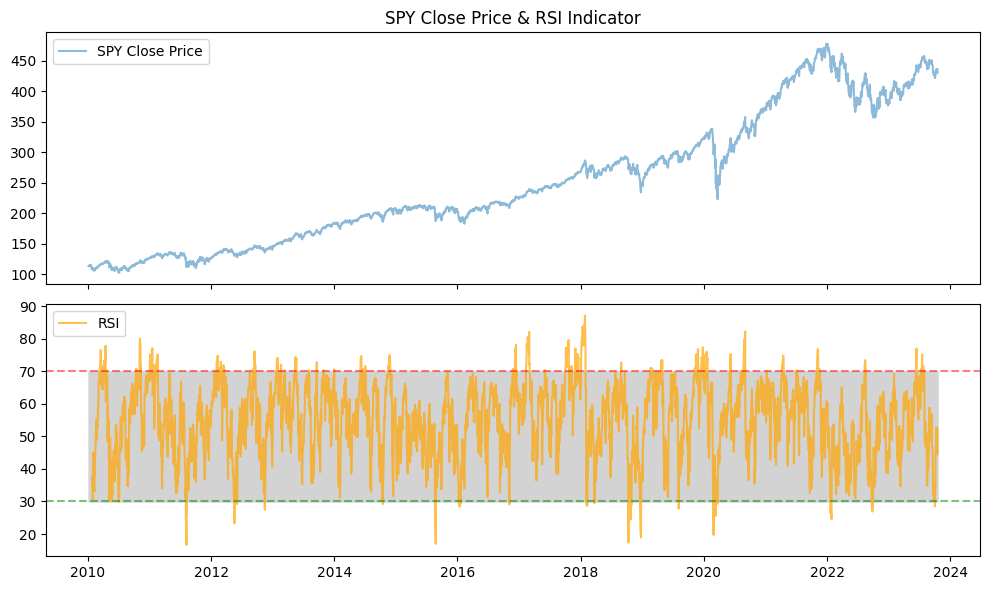

[*********************100%%**********************]  1 of 1 completed


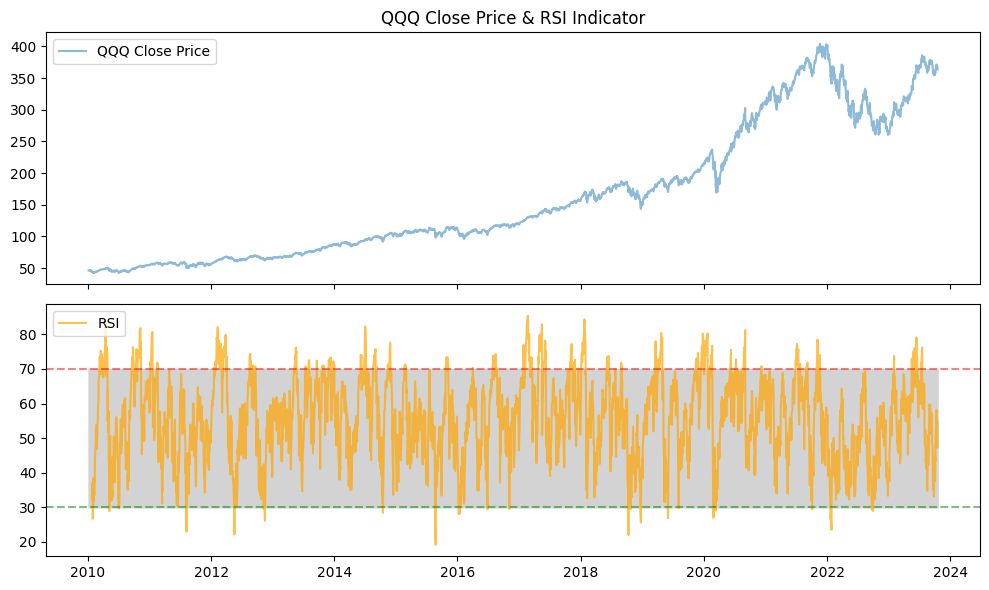

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import talib

# Define a list of tickers
tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'AVGO', 'GS', 'SPY', 'QQQ']

def fetch_data(ticker_symbol):
    end_date = date.today().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2010-01-01", end=end_date)
    return data

def plot_rsi(ticker, data):
    close = data['Close']
    rsi = talib.RSI(close)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)
    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

for ticker in tickers:
    data = fetch_data(ticker)
    plot_rsi(ticker, data)


In [ ]:
# Define a list of tickers
tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'AVGO', 'GS', 'SPY', 'QQQ']

def fetch_data(ticker_symbol):
    end_date = date.today().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2010-01-01", end=end_date)
    return data

def plot_rsi(ticker, data):
    close = data['Close']
    rsi = talib.RSI(close)

    buy_signals = (rsi < 30) & (rsi.shift(1) >= 30)
    sell_signals = (rsi > 70) & (rsi.shift(1) <= 70)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)
    axes[1].scatter(rsi.index, rsi[buy_signals], color='green', label='Buy Signal', marker='^', alpha=1)
    axes[1].scatter(rsi.index, rsi[sell_signals], color='red', label='Sell Signal', marker='v', alpha=1)
    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

for ticker in tickers:
    data = fetch_data(ticker)
    plot_rsi(ticker, data)


In [ ]:
# Define a list of tickers
tickers = ['AAPL', 'TSLA', 'IWM', 'GLD', 'TLT', 'AVGO', 'GS', 'SPY', 'QQQ']

def fetch_data(ticker_symbol):
    end_date = date.today().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2010-01-01", end=end_date)
    return data

def plot_rsi(ticker, data):
    close = data['Close']
    rsi = talib.RSI(close)

    buy_signals = (rsi < 30) & (rsi.shift(1) >= 30)
    sell_signals = (rsi > 70) & (rsi.shift(1) <= 70)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)
    axes[1].scatter(rsi.index, rsi[buy_signals], color='green', label='Buy Signal', marker='^', alpha=1)
    axes[1].scatter(rsi.index, rsi[sell_signals], color='red', label='Sell Signal', marker='v', alpha=1)
    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

for ticker in tickers:
    data = fetch_data(ticker)
    plot_rsi(ticker, data)

def plot_rsi(ticker, data):
    close = data['Close']
    rsi = talib.RSI(close)

    buy_signals = (rsi < 30) & (rsi.shift(1) >= 30)
    sell_signals = (rsi > 70) & (rsi.shift(1) <= 70)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)

    # Plot buy signals only if there are any
    if buy_signals.any():
        axes[1].scatter(rsi.index[buy_signals], rsi[buy_signals], color='green', label='Buy Signal', marker='^', alpha=1)
    # Plot sell signals only if there are any
    if sell_signals.any():
        axes[1].scatter(rsi.index[sell_signals], rsi[sell_signals], color='red', label='Sell Signal', marker='v', alpha=1)

    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()



In [18]:
def plot_rsi(ticker, data):
    close = data['Close']
    rsi = talib.RSI(close).dropna()  # Drop NaN values

    buy_signals = (rsi < 30) & (rsi.shift(1) >= 30)
    sell_signals = (rsi > 70) & (rsi.shift(1) <= 70)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)

    # Plot buy signals only if there are any
    if buy_signals.any():
        axes[1].scatter(rsi.index[buy_signals], rsi[buy_signals], color='green', label='Buy Signal', marker='^', alpha=1)
    # Plot sell signals only if there are any
    if sell_signals.any():
        axes[1].scatter(rsi.index[sell_signals], rsi[sell_signals], color='red', label='Sell Signal', marker='v', alpha=1)

    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()


In [ ]:
def fetch_data(ticker_symbol):
    end_date = date.today().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2023-01-01", end=end_date)
    return data

def simple_rsi_plot(ticker):
    data = fetch_data(ticker)
    close = data['Close']
    rsi = talib.RSI(close)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)
    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

simple_rsi_plot('AAPL')


To run the below code, chatGPT advises: "Just ensure you've already executed the previous code that imports necessary libraries and defines the fetch_data function. After that, you can simply run the rsi_with_signals_plot function to see the RSI chart with signals for 'AAPL' or any other ticker you want to analyze.

Here's a step-by-step breakdown:

Execute the initial code block that imports necessary libraries and defines the fetch_data function.
Execute the rsi_with_signals_plot function definition.
Call the function with rsi_with_signals_plot('AAPL') to see the RSI chart with signals for 'AAPL'."

So need to run the code in steps, one at a time.

Also changed time frame to 1/1/23 to present and chart seems to provide a clearer picture of Buy Sell signals. But, consider that, per chatGPT: The RSI was introduced by Welles Wilder in his 1978 book "New Concepts in Technical Trading Systems." In it, Wilder recommended using 14 periods for the RSI calculation, and this recommendation has stood the test of time. 14 periods can be 14 minutes to 14 weeks, etc. As long as it is a 14 period setting

[*********************100%%**********************]  1 of 1 completed


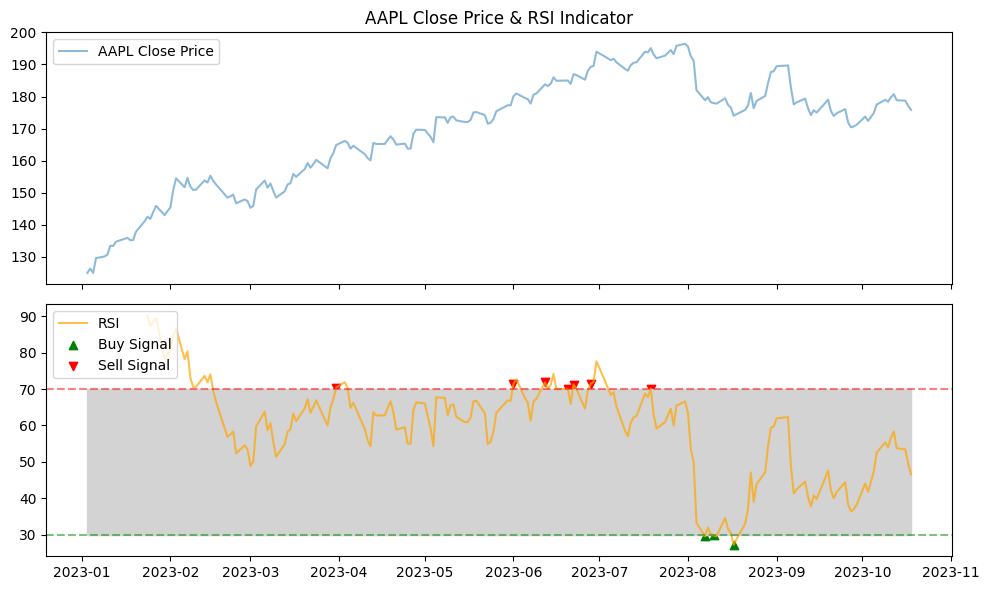

In [22]:
def rsi_with_signals_plot(ticker):
    data = fetch_data(ticker)
    close = data['Close']
    rsi = talib.RSI(close)

    buy_signals = (rsi < 30) & (rsi.shift(1) >= 30)
    sell_signals = (rsi > 70) & (rsi.shift(1) <= 70)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)

    # Mark buy signals
    if buy_signals.any():
        axes[1].scatter(rsi[buy_signals].index, rsi[buy_signals], color='green', label='Buy Signal', marker='^', alpha=1)

    # Mark sell signals
    if sell_signals.any():
        axes[1].scatter(rsi[sell_signals].index, rsi[sell_signals], color='red', label='Sell Signal', marker='v', alpha=1)

    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

rsi_with_signals_plot('AAPL')


Below, all above codes consolidated into one code

[*********************100%%**********************]  1 of 1 completed


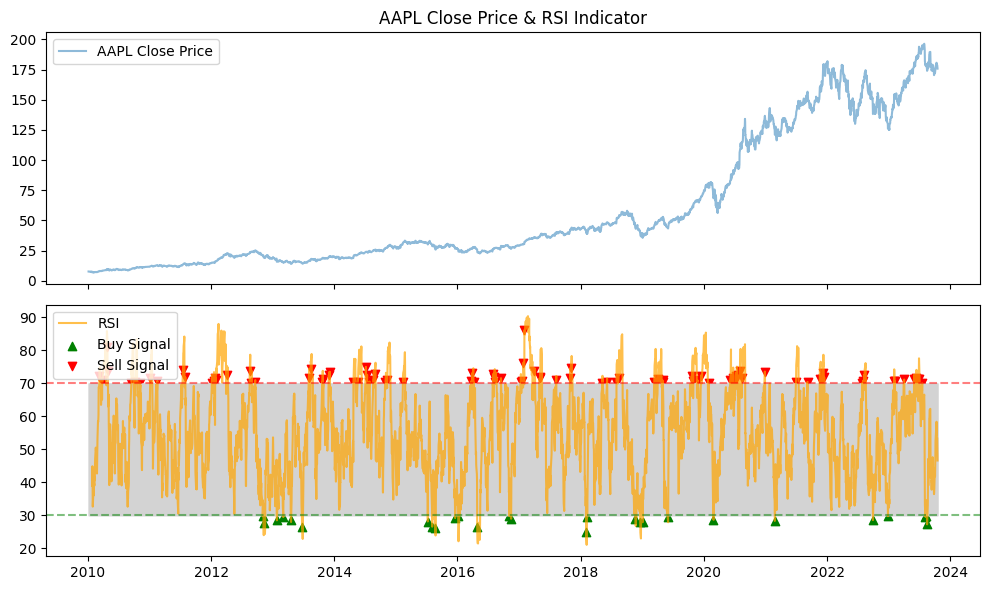

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import talib

def fetch_data(ticker_symbol):
    end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2023-09-30", end=end_date)
    return data

def rsi_with_signals_plot(ticker):
    data = fetch_data(ticker)
    close = data['Close']
    rsi = talib.RSI(close)

    buy_signals = (rsi < 30) & (rsi.shift(1) >= 30)
    sell_signals = (rsi > 70) & (rsi.shift(1) <= 70)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)

    # Mark buy signals
    if buy_signals.any():
        axes[1].scatter(rsi[buy_signals].index, rsi[buy_signals], color='green', label='Buy Signal', marker='^', alpha=1)

    # Mark sell signals
    if sell_signals.any():
        axes[1].scatter(rsi[sell_signals].index, rsi[sell_signals], color='red', label='Sell Signal', marker='v', alpha=1)

    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Execute for AAPL
rsi_with_signals_plot('AAPL')


[*********************100%%**********************]  1 of 1 completed


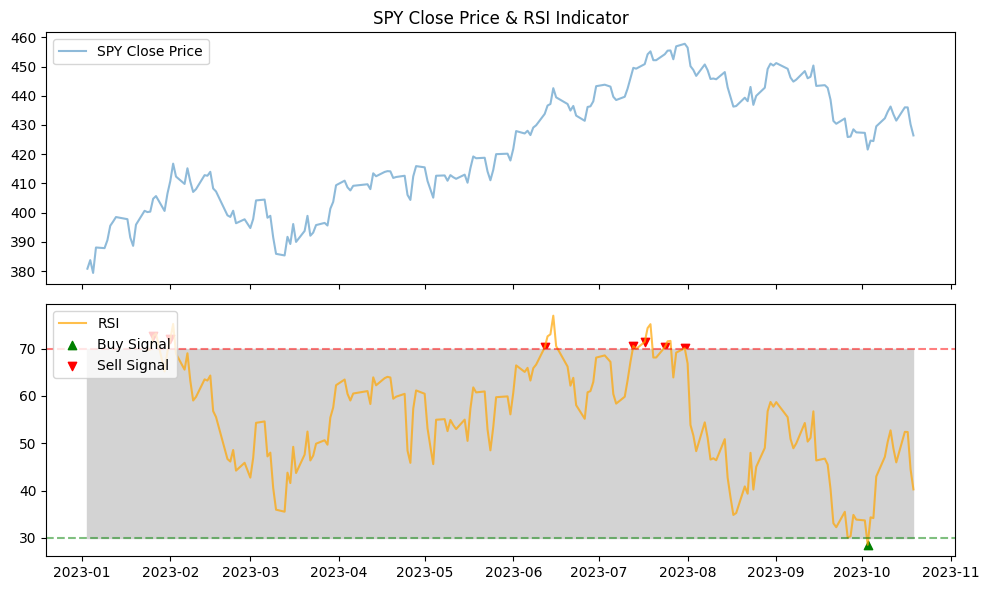

[*********************100%%**********************]  1 of 1 completed


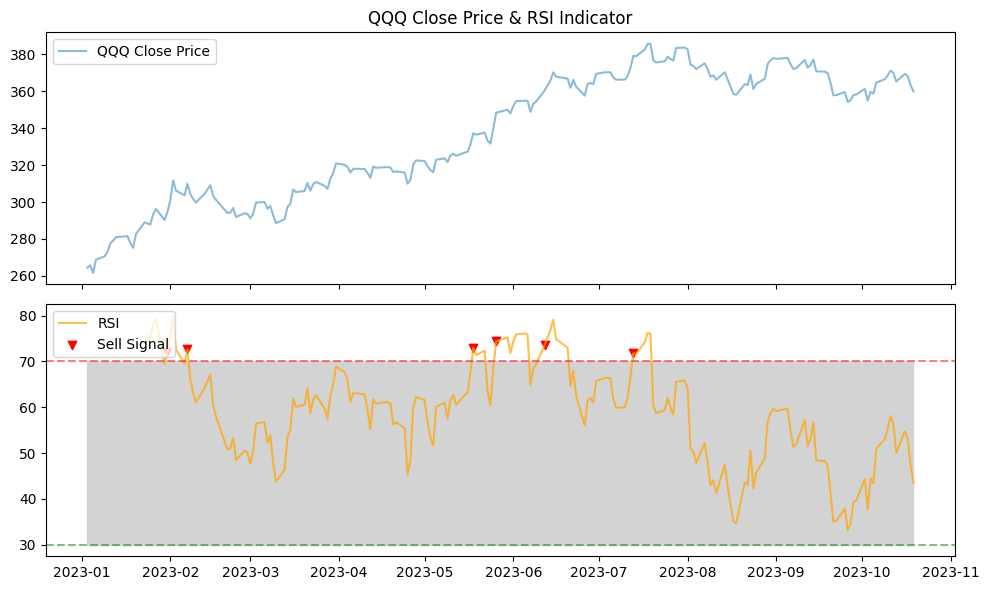

[*********************100%%**********************]  1 of 1 completed


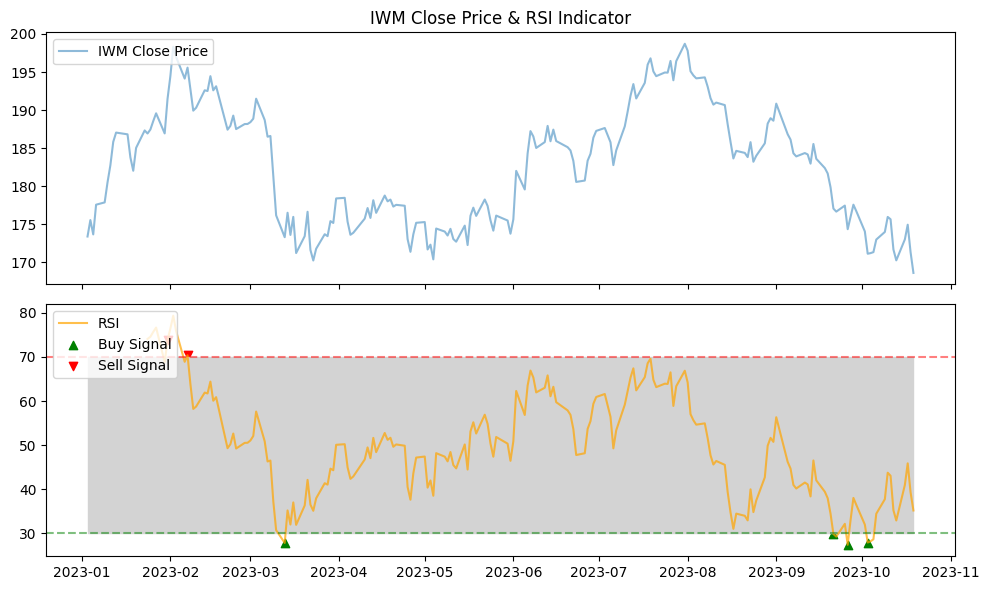

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import talib

# List of tickers you want to analyze
tickers = ['SPY', 'QQQ', 'IWM']  # You can modify this list as needed

def fetch_data(ticker_symbol):
    end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
    data = yf.download(ticker_symbol, start="2023-01-01", end=end_date)
    return data

def rsi_with_signals_plot(ticker):
    data = fetch_data(ticker)
    close = data['Close']
    rsi = talib.RSI(close)

    buy_signals = (rsi < 30) & (rsi.shift(1) >= 30)
    sell_signals = (rsi > 70) & (rsi.shift(1) <= 70)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

    # Plot stock price
    axes[0].plot(close, label=f'{ticker} Close Price', alpha=0.5)
    axes[0].set_title(f'{ticker} Close Price & RSI Indicator')
    axes[0].legend(loc='upper left')

    # Plot RSI
    axes[1].plot(rsi, label='RSI', color='orange', alpha=0.7)

    # Mark buy signals
    if buy_signals.any():
        axes[1].scatter(rsi[buy_signals].index, rsi[buy_signals], color='green', label='Buy Signal', marker='^', alpha=1)

    # Mark sell signals
    if sell_signals.any():
        axes[1].scatter(rsi[sell_signals].index, rsi[sell_signals], color='red', label='Sell Signal', marker='v', alpha=1)

    axes[1].axhline(70, color='red', linestyle='--', alpha=0.5)
    axes[1].axhline(30, color='green', linestyle='--', alpha=0.5)
    axes[1].fill_between(rsi.index, y1=30, y2=70, color='lightgray')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Loop through each ticker to generate the RSI chart
for ticker in tickers:
    rsi_with_signals_plot(ticker)
